Dataset loaded successfully.

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 no

C:\Users\Sue\AppData\Local\Temp\ipykernel_7276\3522120503.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby("species").mean()


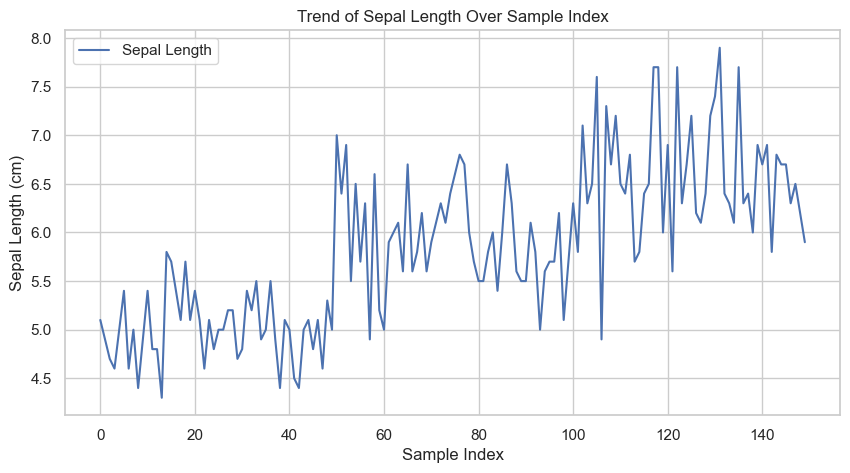

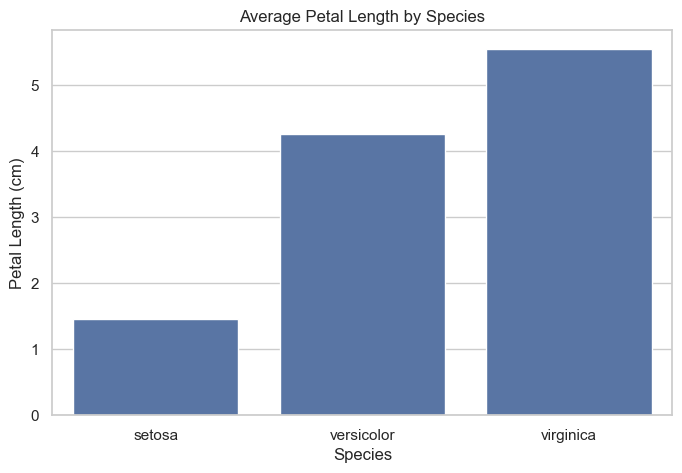

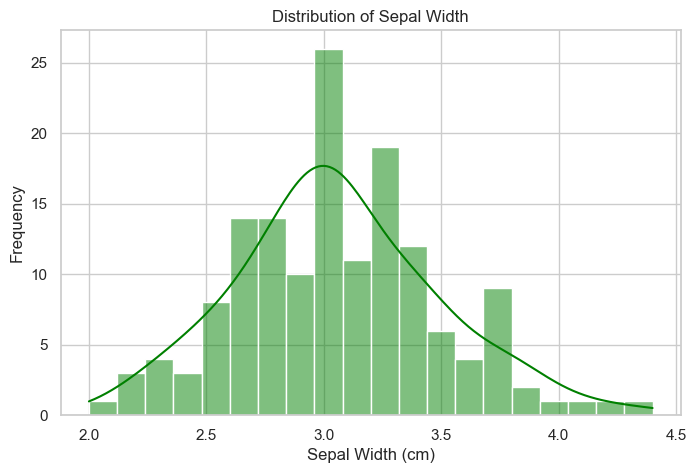

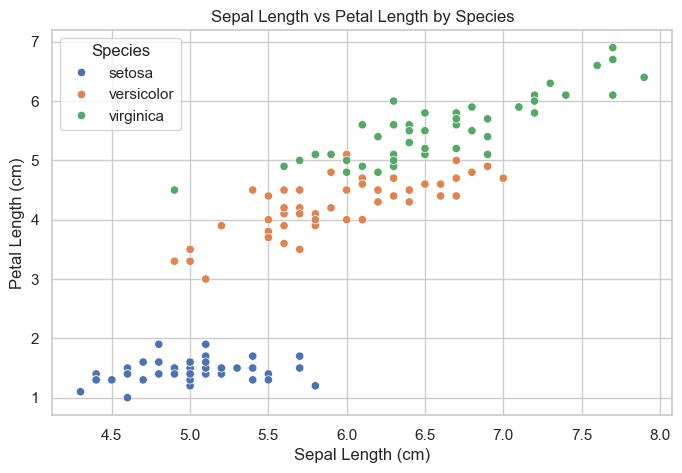

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Enable inline plotting for Jupyter Notebook users (optional)
# %matplotlib inline

# Task 1: Load and Explore the Dataset
try:
    # Load the Iris dataset
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Explore structure
print("\nDataset Info:")
print(df.info())

print("\nCheck for missing values:")
print(df.isnull().sum())

# Clean the dataset (Iris dataset doesn't have missing values, but let's show how to handle it)
df_cleaned = df.dropna()  # Alternatively: df.fillna(method='ffill', inplace=True)

# Task 2: Basic Data Analysis

# Basic statistics
print("\nStatistical Summary:")
print(df_cleaned.describe())

# Grouping by species
print("\nAverage feature values per species:")
grouped = df_cleaned.groupby("species").mean()
print(grouped)

# Identifying patterns
print("\nObservation:")
print("Setosa species has generally smaller petal length and width compared to Versicolor and Virginica.")

# Task 3: Data Visualization
sns.set(style="whitegrid")

# 1. Line chart (not ideal for Iris, but let's simulate a time index)
df_cleaned['index'] = range(len(df_cleaned))
plt.figure(figsize=(10, 5))
sns.lineplot(x='index', y='sepal length (cm)', data=df_cleaned, label='Sepal Length')
plt.title("Trend of Sepal Length Over Sample Index")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

# 2. Bar chart: average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y='petal length (cm)', data=grouped.reset_index())
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

# 3. Histogram: distribution of sepal width
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['sepal width (cm)'], kde=True, bins=20, color='green')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot: sepal length vs petal length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df_cleaned)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.show()
